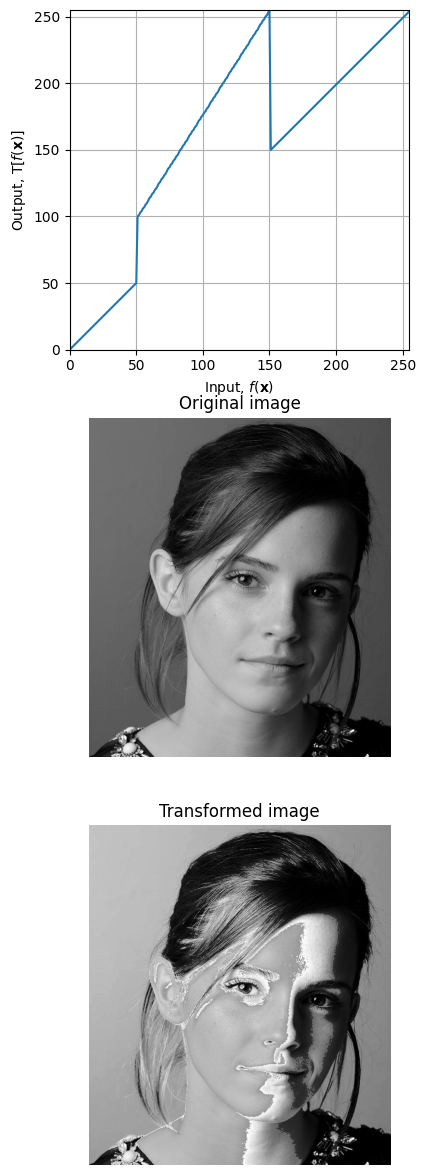

In [6]:
# Q1

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = [(50,100,255,150),(50,150)]
# Generate an array of 51 values between 0 and 50 (inclusive).
t1 = np.linspace(0, c[0][0], c[1][0]+1-0).astype('uint8')
# Generate an array of 100 values between 100 and 255 (inclusive).
t2 = np.linspace(c[0][1], c[0][2], c[1][1]-c[1][0]).astype('uint8')
# Generate an array of 105 values between 150 and 255 (inclusive).
t3 = np.linspace(c[0][3], 255, 255-c[1][1]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = transform[img_orig]

fig, ax = plt.subplots(3,1, figsize=(5,15))
ax[0].plot(np.arange(256), transform)  # Plotting the transformation function
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[1].imshow(img_orig, cmap='gray')  # Show the original image
ax[1].set_title('Original image')
ax[1].axis('off')
ax[2].imshow(image_transformed, cmap='gray')  # Show the transformed image
ax[2].set_title('Transformed image')
ax[2].axis('off')
plt.show()


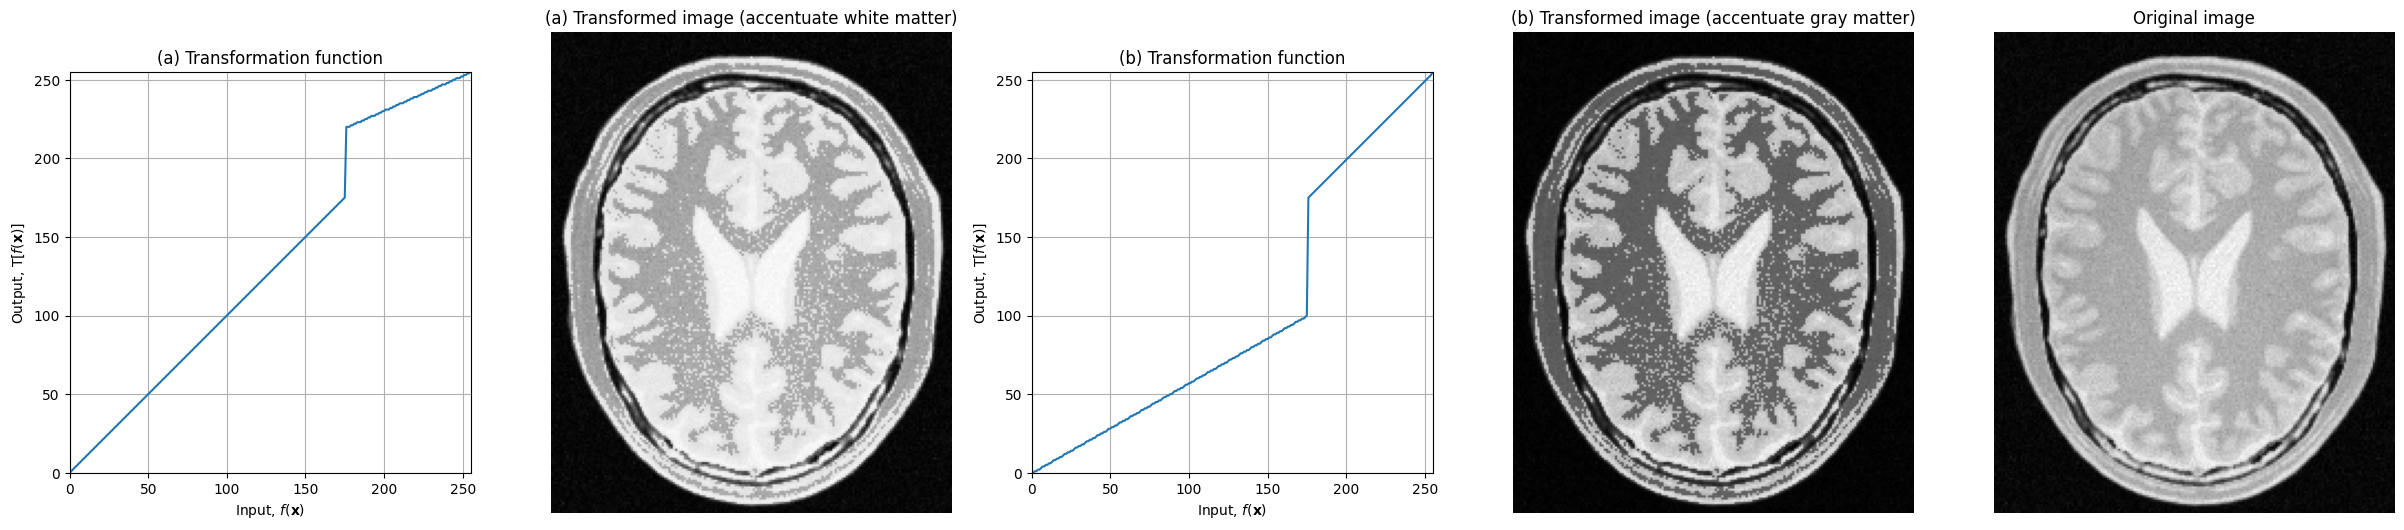

In [13]:
# Q2

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# (a) to accentuate white matter
# Generate an array of 101 values between 0 and 100 (inclusive).
t1 = np.linspace(0, 175,176).astype('uint8')
# Generate an array of 155 values between 150 and 255 (inclusive).
t2 = np.linspace(220,255,80).astype('uint8')
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')

# (b) to accentuate gray matter
# Generate an array of 101 values between 0 and 100 (inclusive).
t3 = np.linspace(0, 100,176).astype('uint8')
# Generate an array of 155 values between 150 and 255 (inclusive).
t4 = np.linspace(175,255,80).astype('uint8')
transform2 = np.concatenate((t3, t4), axis=0).astype('uint8')

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
image_transformed1 = transform1[img_orig]
image_transformed2 = transform2[img_orig]

fig, ax = plt.subplots(1,5,figsize=(30,8))
ax[0].plot(np.arange(256), transform1)  # Plotting the transformation function
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].set_title('(a) Transformation function')
ax[0].grid(True)
ax[1].imshow(image_transformed1, cmap='gray')  # Show the transformed image
ax[1].set_title('(a) Transformed image (accentuate white matter)')
ax[1].axis('off')
ax[2].plot(np.arange(256), transform2)  # Plotting the transformation function
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')
ax[2].set_title('(b) Transformation function')
ax[2].grid(True)
ax[3].imshow(image_transformed2, cmap='gray')  # Show the transformed image
ax[3].set_title('(b) Transformed image (accentuate gray matter)')
ax[3].axis('off')
ax[4].imshow(img_orig, cmap='gray')  # Show the original image
ax[4].set_title('Original image')
ax[4].axis('off')
plt.show()


Gamma Correction: Gamma = 0.5
Gamma Correction: Gamma = 0.6
Gamma Correction: Gamma = 0.7
Gamma Correction: Gamma = 0.8
Gamma Correction: Gamma = 0.9
Gamma Correction: Gamma = 1.0
Gamma Correction: Gamma = 1.1
Gamma Correction: Gamma = 1.2
Gamma Correction: Gamma = 1.3
Gamma Correction: Gamma = 1.4


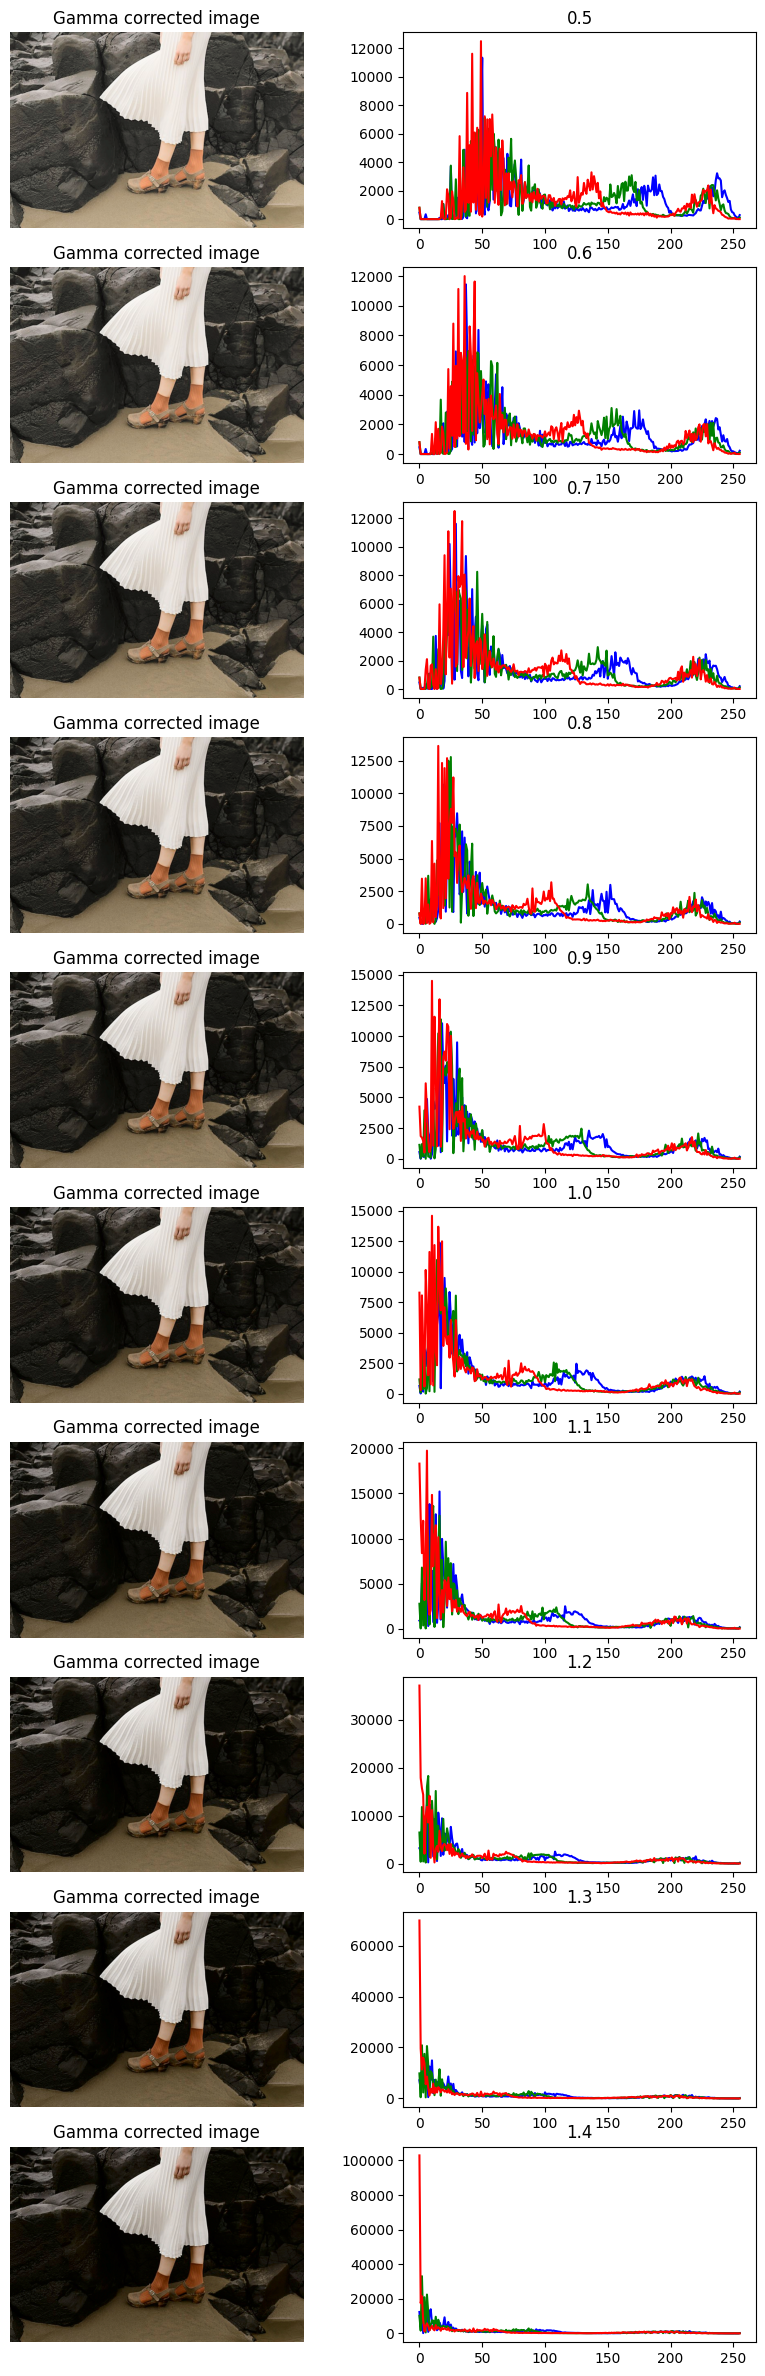

In [17]:
# Q3.(a) Gamma Correction

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_converted = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_converted)
f, ax = plt.subplots(10,2,figsize=(10,30))

for i in range(5,15):
    gamma = i/10.0
    table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
    L_gamma = cv.LUT(L, table)

    # Create a blank image with the same dimensions as the channels
    height, width = L.shape
    img_gamma = np.zeros((height, width, 3), dtype=np.uint8)

    # Assign the separated channels to the image
    img_gamma[:,:,0] = L_gamma
    img_gamma[:,:,1] = a
    img_gamma[:,:,2] = b

    # Convert the LAB image back to BGR color space
    img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2BGR)

    img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
    img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

    
    #ax[0,0].imshow(img_orig)# Show the original image
    ax[int((i-5)),0].imshow(img_gamma)# Show the gamma corrected image
    
    #ax[0,0].set_title('Original image')
    #ax[0,0].axis('off')
    ax[int((i-5)),0].set_title('Gamma corrected image')
    ax[int((i-5)),0].axis('off')



    print("Gamma Correction: Gamma = " + str(gamma))

    # Q3.(b) Histograms

    color = ('b', 'g', 'r')
    for j, c in enumerate(color):
        #hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
        #ax[1,0].plot(hist_orig, color = c)
        #ax[1,0].set_title('Original image histogram')
        hist_gamma = cv.calcHist([img_gamma], [j], None, [256], [0,256])
        ax[int((i-5)),1].plot(hist_gamma, color = c)
        ax[int((i-5)),1].set_title(str(gamma))

plt.show()

The value of a is 0.5


Text(0.5, 1.0, 'Intensity Transformation Function')

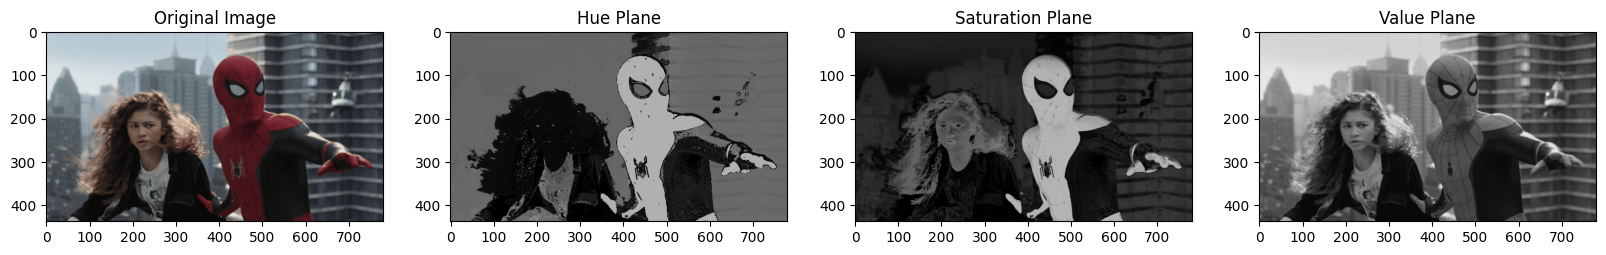

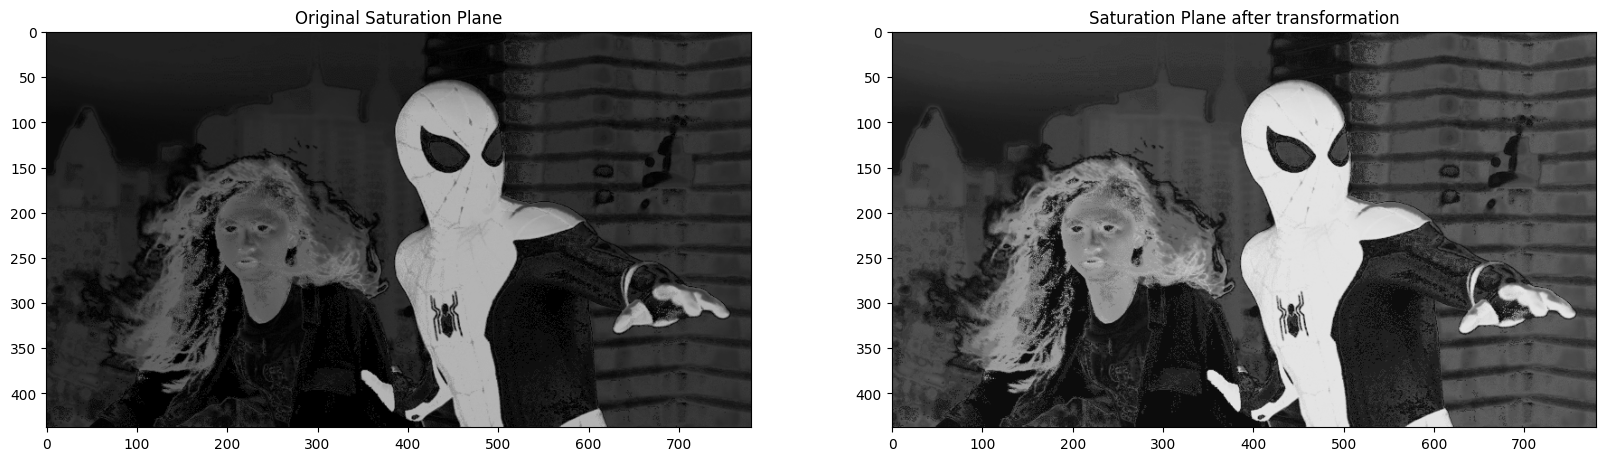

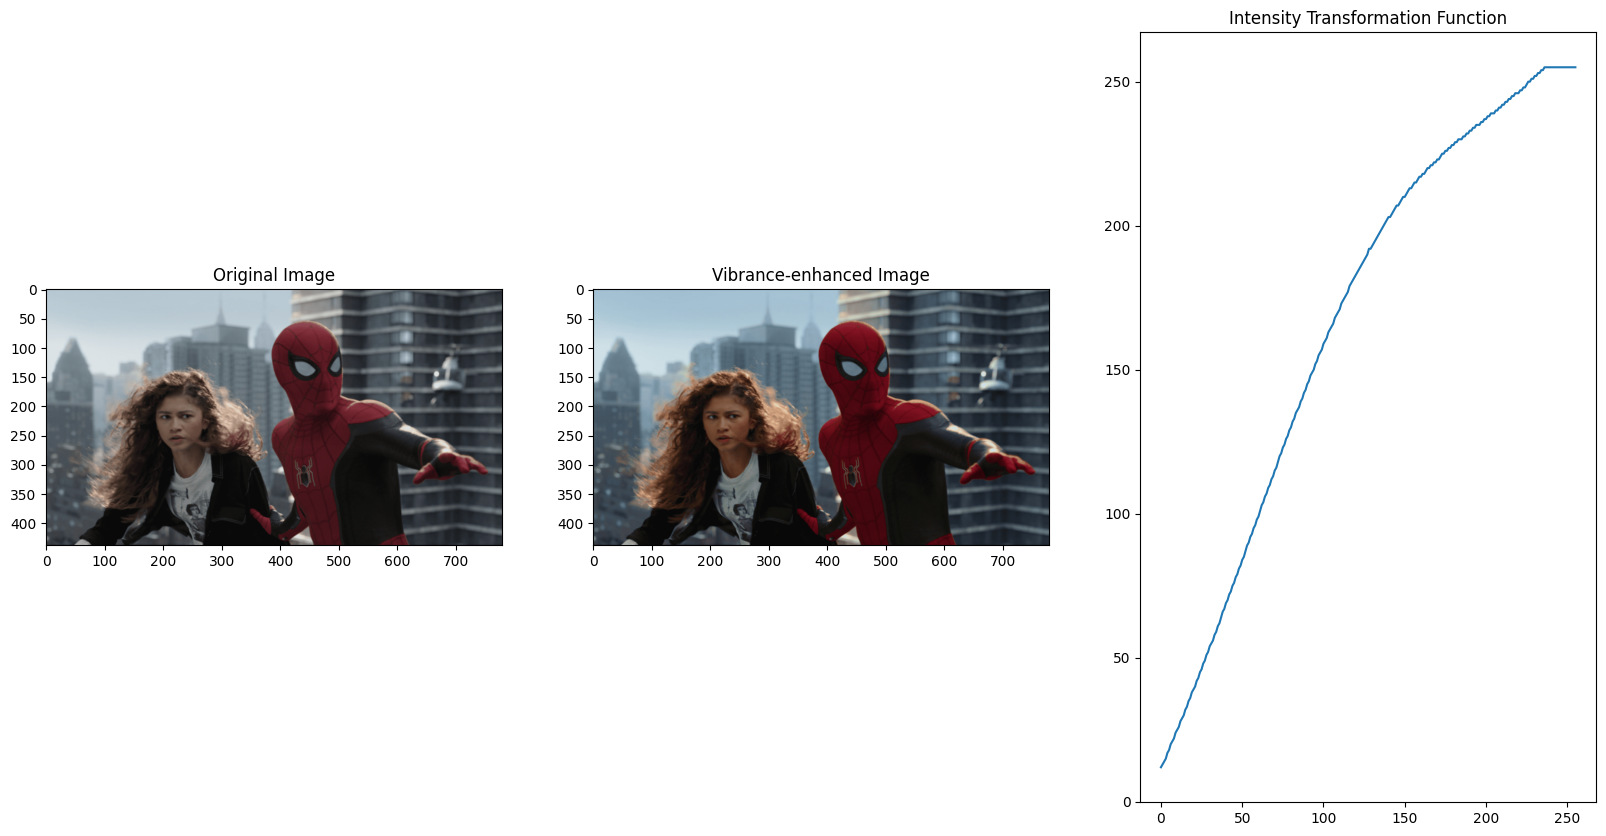

In [5]:
# Q4
#(a). Split the image shown in  into hue, saturation, and value planes.
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)

# Convert the image from BGR to HSV color space
imag_hvs = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value components
h, s, v = cv.split(imag_hvs)

# Display or save the individual HSV planes

f, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))# Show the original image
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB))# Show the hue plane
ax[1].set_title('Hue Plane')
ax[2].imshow(cv.cvtColor(s,cv.COLOR_BGR2RGB))# Show the saturation plane
ax[2].set_title('Saturation Plane')
ax[3].imshow(cv.cvtColor(v,cv.COLOR_BGR2RGB))# Show the value plane
ax[3].set_title('Value Plane')


# (b) Apply the intensity transformation to the saturation plane
a=0.5
sigma=70
f_x = np.array([np.min([255, int(i + a*128 * np.exp(-(i-128)**2/(2*sigma**2)))]) for i in range(256)], dtype=np.uint8)
s_new = f_x[s] # Apply the transformation to the saturation plane
f, ax2 = plt.subplots(1,2,figsize=(20,10))
ax2[0].imshow(cv.cvtColor(s,cv.COLOR_BGR2RGB))# Show the original saturation plane
ax2[0].set_title('Original Saturation Plane')
ax2[1].imshow(cv.cvtColor(s_new,cv.COLOR_BGR2RGB))# Show the saturation plane after transformation
ax2[1].set_title('Saturation Plane after transformation')

# (c)
print('The value of a is',a)

# (d) Recombine the three planes.
imag_hvs_new = cv.merge([(h), s_new, (v)]) # Recombine the three planes
img_orig = cv.merge([(h), (s), (v)])
imag_hvs_new = cv.cvtColor(imag_hvs_new, cv.COLOR_HSV2BGR) # Convert the image back to BGR color space
img_orig = cv.cvtColor(img_orig, cv.COLOR_HSV2BGR)


# (e) Display the original image, vibrance-enhanced image, and the intensity transformation
# function in a single figure.
f, ax3 = plt.subplots(1,3,figsize=(20,10))
ax3[0].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))# Show the original image
ax3[0].set_title('Original Image')
ax3[1].imshow(cv.cvtColor(imag_hvs_new,cv.COLOR_BGR2RGB))# Show the vibrance-enhanced image
ax3[1].set_title('Vibrance-enhanced Image')
ax3[2].plot(f_x)# Show the intensity transformation function
ax3[2].set_title('Intensity Transformation Function')





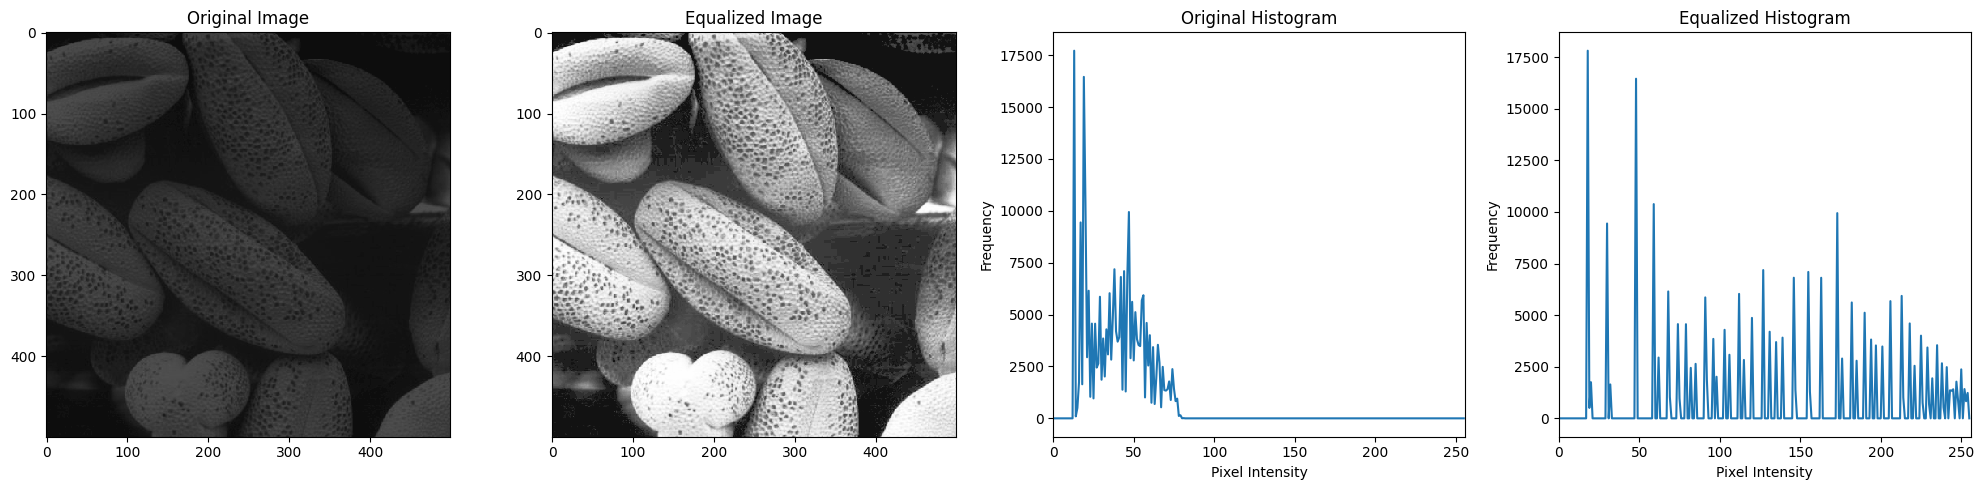

In [1]:
# Q5

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the image in grayscale
img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
M, N = img.shape

# Flatten the image and count pixel intensities using Counter
img_flat = img.flatten()
intensity_counts = Counter(img_flat)

# Calculate the cumulative distribution function (CDF)
cumulative_count = 0
transformation = {}
#for i in range(min(img_flat), max(img_flat) + 1):
for i in range(0, 255 + 1):
    cumulative_count += intensity_counts[i]
    transformation[i] = cumulative_count / (M * N)

# Round the transformation values
#transformation = {i: round(value * (max(img_flat)-1)) for i, value in transformation.items()}
transformation = {i: round(value * (255-1)) for i, value in transformation.items()}
transformation_values = np.array([transformation[i] for i in img_flat], dtype=np.uint8)

# Reshape the transformed values back to image dimensions
img_new = transformation_values.reshape(M, N)

# Display the equalized image

f, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img, cmap='gray',vmin=0, vmax=255, interpolation='none')
ax[0].set_title('Original Image')

# Show the equalized image
ax[1].imshow(img_new, cmap='gray',vmin=0, vmax=255, interpolation='none')
ax[1].set_title('Equalized Image')


# Plot the original histogram
#org_hist = cv.calcHist([img], [0], None, [max(img_flat)+1-min(img_flat)], [int(min(img_flat)),int(max(img_flat)+1)])
org_hist = cv.calcHist([img], [0], None, [255+1-0], [int(0),int(255+1)])
ax[2].plot(org_hist)
#ax[2].set_xlim([int(min(img_flat)),int(max(img_flat)+1)])
ax[2].set_xlim([int(0),int(255+1)])
ax[2].set_title('Original Histogram')
ax[2].set_xlabel('Pixel Intensity')
ax[2].set_ylabel('Frequency')

# Plot the equalized histogram
#eq_hist = cv.calcHist([img_new], [0], None, [max(img_flat)+1-min(img_flat)], [int(min(img_flat)),int(max(img_flat)+1)])
eq_hist = cv.calcHist([img_new], [0], None, [255+1-0], [int(0),int(255+1)])
ax[3].plot(eq_hist)
#ax[3].set_xlim([int(min(img_flat)),int(max(img_flat)+1)])
ax[3].set_xlim([int(0),int(255+1)])
ax[3].set_title('Equalized Histogram')
ax[3].set_xlabel('Pixel Intensity')
ax[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()









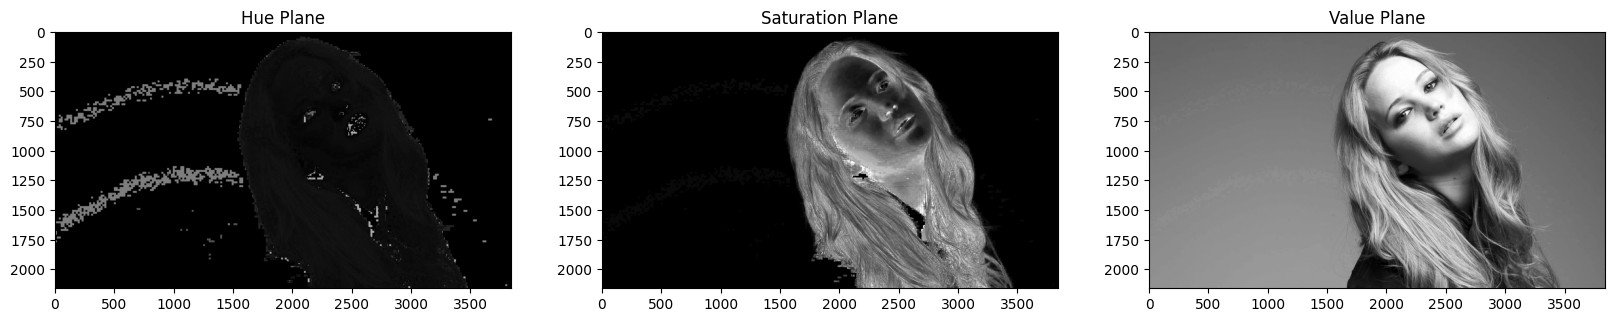

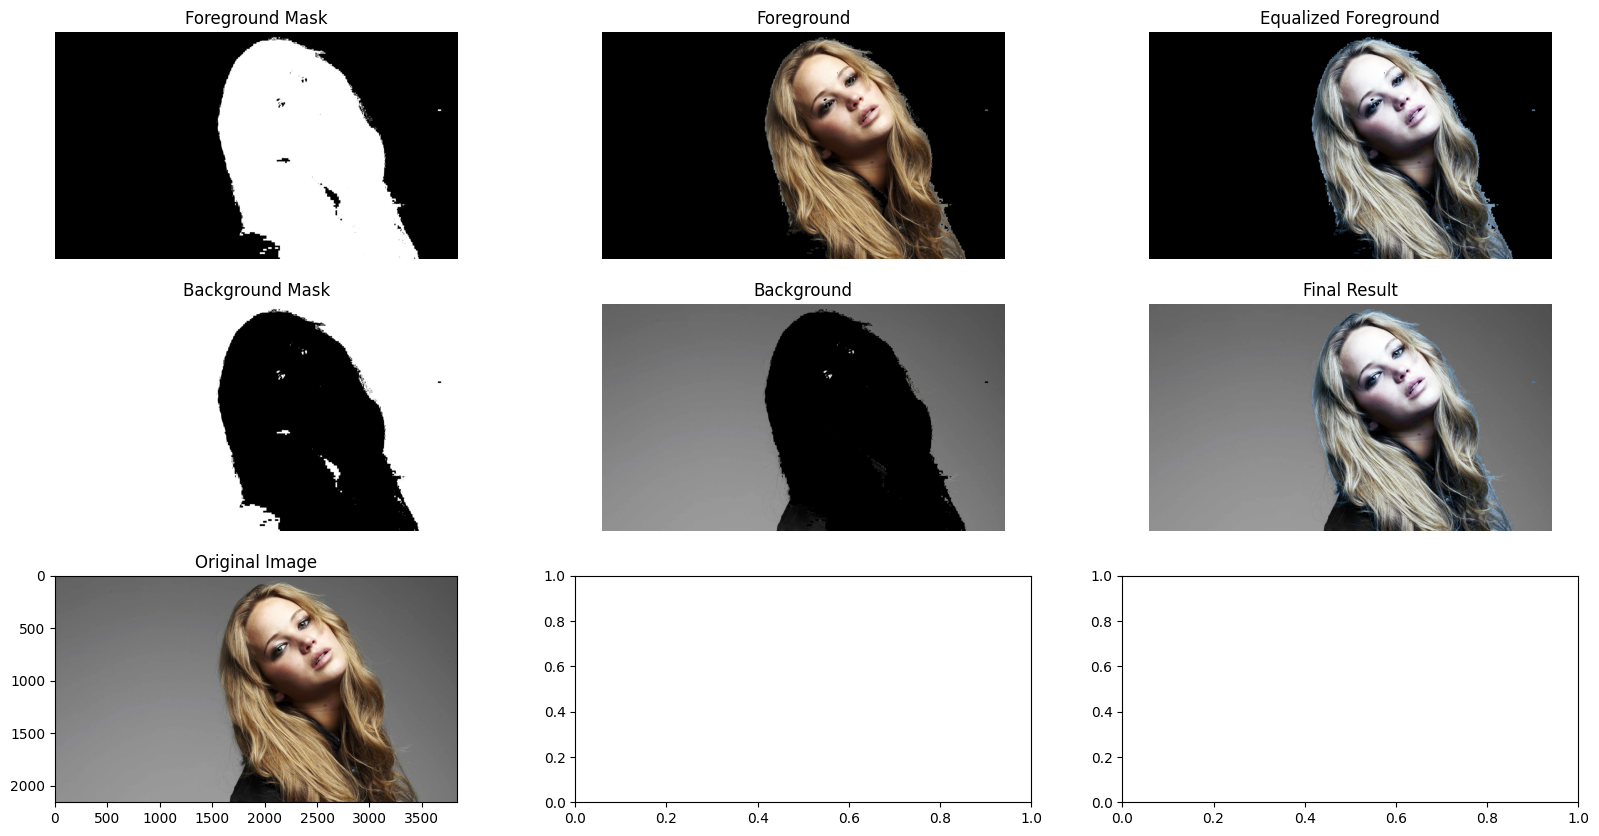

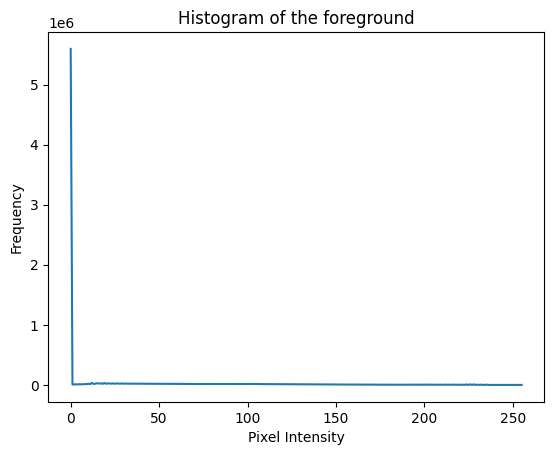

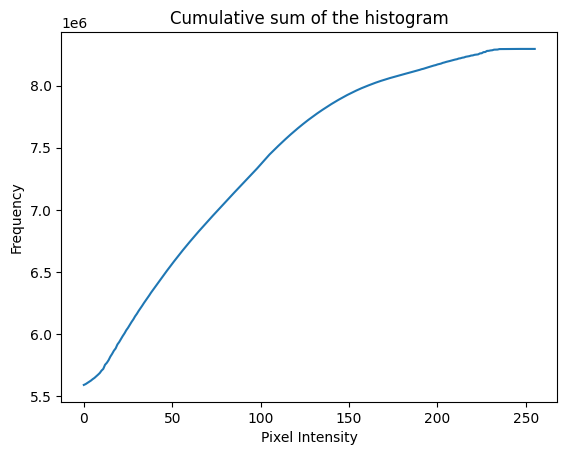

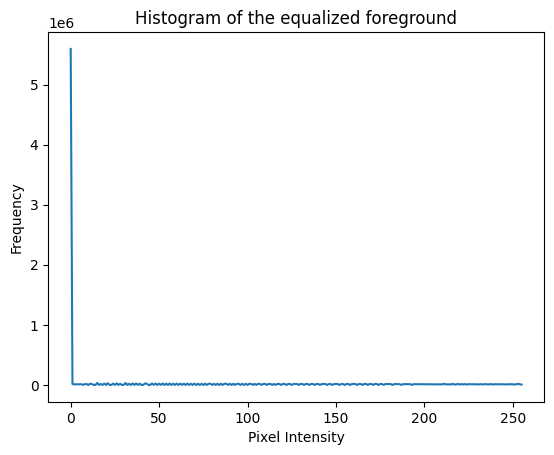

In [59]:
# Q6

#(a). Split the image shown in  into hue, saturation, and value planes.
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)

# Convert the image from BGR to HSV color space
imag_hvs = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value components
h, s, v = cv.split(imag_hvs)

f, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB))# Show the hue plane
ax[0].set_title('Hue Plane')
ax[1].imshow(cv.cvtColor(s,cv.COLOR_BGR2RGB))# Show the saturation plane
ax[1].set_title('Saturation Plane')
ax[2].imshow(cv.cvtColor(v,cv.COLOR_BGR2RGB))# Show the value plane
ax[2].set_title('Value Plane')
plt.show()

# (b) Threshold to extract the foreground mask
threshold_value = 11.5
_, foreground_mask = cv.threshold(s, threshold_value, 255, cv.THRESH_BINARY)



# (c) Obtain foreground and compute histogram
foreground = cv.bitwise_and(img_orig, img_orig, mask=foreground_mask)
hist = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Obtain the cumulative sum of the histogram
cumulative_sum = np.cumsum(hist)





# Split the foreground image into B, G, and R channels
b, g, r = cv.split(foreground)

# Apply histogram equalization to each channel
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge the equalized channels back into a BGR image
equalized_foreground = cv.merge((b_eq, g_eq, r_eq))

# Compute the histogram of the equalized image
hist2 = cv.calcHist([equalized_foreground], [0], None, [256], [0, 256])



# Invert the foreground mask to obtain the background mask
background_mask = cv.bitwise_not(foreground_mask)

# Extract the background
background = cv.bitwise_and(img_orig, img_orig, mask=background_mask)

# Add the equalized foreground and background
result = cv.add(equalized_foreground, background)

# Display the equalized image

f, ax2 = plt.subplots(3,3, figsize=(20,10))
ax2[0,0].imshow(cv.cvtColor(foreground_mask,cv.COLOR_BGR2RGB))# show the foreground mask
ax2[0,0].set_title('Foreground Mask')
ax2[0,1].imshow(cv.cvtColor(foreground,cv.COLOR_BGR2RGB))# Show the hue plane
ax2[0,1].set_title('Foreground')
ax2[0,1].axis('off')
ax2[0,0].axis('off')
ax2[0,2].imshow(cv.cvtColor(equalized_foreground,cv.COLOR_BGR2RGB))# show the equalized foreground
ax2[0,2].set_title('Equalized Foreground')
ax2[0,2].axis('off')
ax2[1,0].imshow(cv.cvtColor(background_mask,cv.COLOR_BGR2RGB))# show the background mask
ax2[1,0].set_title('Background Mask')
ax2[1,0].axis('off')
ax2[1,1].imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB))# Show the background
ax2[1,1].set_title('Background')
ax2[1,1].axis('off')
ax2[1,2].imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))# show the final result
ax2[1,2].set_title('Final Result')
ax2[1,2].axis('off')
ax2[2,0].imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))# Show the original image
ax2[2,0].set_title('Original Image')
plt.show()

plt.plot(hist)
plt.title('Histogram of the foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

plt.plot(cumulative_sum)
plt.title('Cumulative sum of the histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


plt.plot(hist2)
plt.title('Histogram of the equalized foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

(1, 3)
(3, 1)


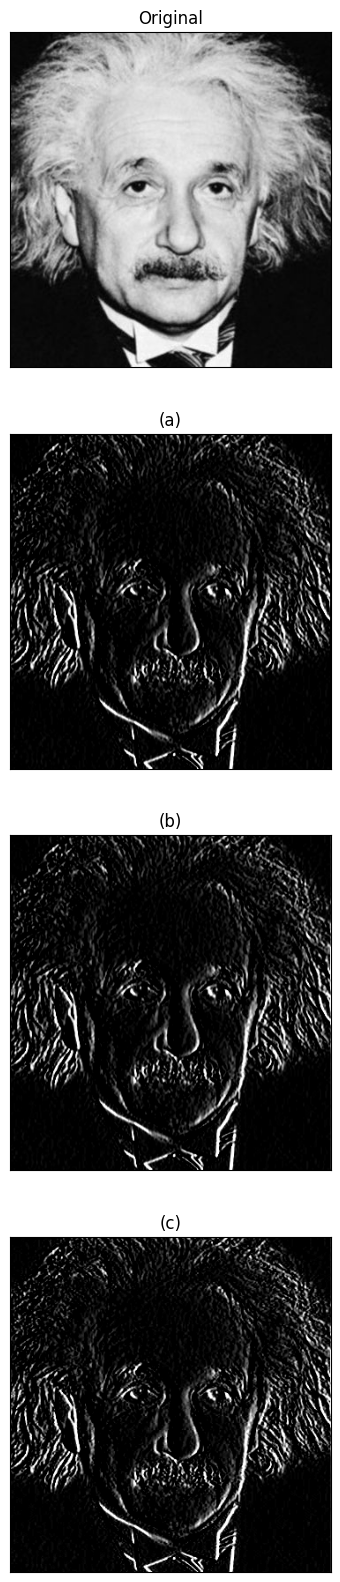

In [13]:
# Q7
# (a) Using the existing filter2D to Sobel filter the image.
%matplotlib inline
# Sobel Vertical and horizontal
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

def sobel_filter1(img, kernel):
    img = np.array(img, dtype=np.float32)
    # Flip the kernel
    #kernel = np.flipud(np.fliplr(kernel))

    
    filtered_img = np.zeros_like(img)
    # Determine padding size for valid convolution
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    # Add zero padding to the input image
    img_padded = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            region = img_padded[x : x + kernel.shape[0], y : y + kernel.shape[1]]
            filtered_img[x, y] = np.sum(region * kernel)
            if filtered_img[x, y] < 0:
                filtered_img[x, y] = 0
            elif filtered_img[x, y] > 255:
                filtered_img[x, y] = 255
    
    filtered_img = filtered_img.astype(np.uint8)
    return filtered_img


def sobel_filter2(img, horizontal, vertical):
    '''
    Use the property of separability to implement the Sobel filte
    '''

    img = np.array(img, dtype=np.float32)

    filtered_img = np.zeros_like(img)
    # Determine padding size for valid convolution
    pad_height = horizontal.shape[1] // 2
    pad_width = vertical.shape[0] // 2
    
    # Add zero padding to the input image
    img_padded = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            region = img_padded[x : x + horizontal.shape[0], y : y + horizontal.shape[1]]
            filtered_img[x, y] = np.sum(region * vertical * horizontal )
            if filtered_img[x, y] < 0:
                filtered_img[x, y] = 0
            elif filtered_img[x, y] > 255:
                filtered_img[x, y] = 255
    return filtered_img

# (a) Using the existing filter2D to Sobel filter the image
kernel1 = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype='float')#top to botton dark to bright
imgc1 = cv.filter2D(img,-1,kernel1)

# (b) Custom Sobel filter
imgc2 = sobel_filter1(img,kernel1)


# (c) Using the property of separability to implement the Sobel filter
kernel_H = np.array([[1,0,-1]])
print(kernel_H.shape)
kernel_V = np.array([[1],[2],[1]])
print(kernel_V.shape)
kernel_H1 = np.array([])
imgc3 = sobel_filter2(img,kernel_H,kernel_V)


fig, axes  = plt.subplots(4,1, sharex='all', sharey='all',figsize=(20,20))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc1, cmap='gray')
axes[1].set_title('(a)')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgc2, cmap='gray')
axes[2].set_title('(b)')
axes[2].set_xticks([]), axes[2].set_yticks([])
axes[3].imshow(imgc3, cmap='gray')
axes[3].set_title('(c)')
axes[3].set_xticks([]), axes[3].set_yticks([])
plt.show()



In [18]:
# Q8

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def NNZoom(img, factor):
    '''
    Zoom an image using nearest neighbour interpolation
    '''
    # Get the dimensions of the image
    height, width = img.shape[:2]
    # Compute the new dimensions of the image
    new_height = int(height * factor)
    new_width = int(width * factor)
    # Create a blank image with the new dimensions
    new_img_R = np.zeros((new_height, new_width), dtype=np.uint8)
    new_img_G = np.zeros((new_height, new_width), dtype=np.uint8)
    new_img_B = np.zeros((new_height, new_width), dtype=np.uint8)
    # Compute the scale factors
    s_x = width / new_width
    s_y = height / new_height
    # Split the original image into its channels
    img_R, img_G, img_B = cv.split(img)
    # Compute the coordinates of the pixels in the new image
    for x in range(new_height):
        for y in range(new_width):
            new_img_R[x, y] = img_R[int(x * s_x), int(y * s_y)]
            new_img_G[x, y] = img_G[int(x * s_x), int(y * s_y)]
            new_img_B[x, y] = img_B[int(x * s_x), int(y * s_y)]
    # Merge the channels into a new image
    new_img = cv.merge((new_img_R, new_img_G, new_img_B))
    return new_img


def bilinear_interpolation(image, scale):
    height, width, channels = image.shape
    new_height = int(height * scale)
    new_width = int(width * scale)

    # Create an empty canvas for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            src_x = x / scale
            src_y = y / scale

            x1 = int(src_x)
            y1 = int(src_y)
            x2 = min(x1 + 1, width - 1)
            y2 = min(y1 + 1, height - 1)

            dx = src_x - x1
            dy = src_y - y1

            for c in range(channels):
                interpolated_value = (1 - dx) * (1 - dy) * image[y1, x1, c] + \
                                     dx * (1 - dy) * image[y1, x2, c] + \
                                     (1 - dx) * dy * image[y2, x1, c] + \
                                     dx * dy * image[y2, x2, c]
                
                
                zoomed_image[y, x, c] = int(interpolated_value)

    return zoomed_image 

def SSD(img1, img2):
    '''
    Compute the normalized sum of squared differences between two images
    '''
    if img1.shape != img2.shape:
        return ('The images  have difference dimensions')
    # Compute the sum of squared differences
    ssd = np.sum((img1 - img2) ** 2)
    # Normalize the SSD
    ssd /= img1.shape[0] * img1.shape[1]
    return ssd
for i in range(1,12):
    num = '0'+str(i)
    img_orig = cv.imread('im'+num[-2]+num[-1]+'small.png', cv.IMREAD_COLOR)
    zoomed_org = cv.imread('im'+num[-2]+num[-1]+'.png', cv.IMREAD_COLOR)
    # Zoom the image using nearest neighbour interpolation
    img_nn = NNZoom(img_orig, 4)
    SSD_nn = SSD(img_nn, zoomed_org)
    # Zoom the image using bilinear interpolation
    img_bilinear = bilinear_interpolation(img_orig, 4)
    SSD_bilinear = SSD(img_bilinear, zoomed_org)

    print('SSD of NNZoom = ',SSD_nn)
    print('SSD of bilinear interpolation = ',SSD_bilinear)

'''f, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(img_nn, cmap='gray')
ax[1].set_title('Nearest Neighbour')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(img_bilinear, cmap='gray')
ax[2].set_title('Bilinear')
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[3].imshow(zoomed_org, cmap='gray')
ax[3].set_title('Original Zoomed')
ax[3].set_xticks([]), ax[3].set_yticks([])
plt.show()'''




SSD of NNZoom =  93.85294945987654
SSD of bilinear interpolation =  117.77109953703703
SSD of NNZoom =  35.706039930555555
SSD of bilinear interpolation =  48.63532986111111
SSD of NNZoom =  The images  have difference dimensions
SSD of bilinear interpolation =  The images  have difference dimensions
SSD of NNZoom =  236.21345172646605
SSD of bilinear interpolation =  244.9762219087577
SSD of NNZoom =  151.73173828125
SSD of bilinear interpolation =  161.1229457465278
SSD of NNZoom =  91.66198784722222
SSD of bilinear interpolation =  106.55307388117284
SSD of NNZoom =  83.89242797851563
SSD of bilinear interpolation =  90.66017993164063
SSD of NNZoom =  The images  have difference dimensions
SSD of bilinear interpolation =  The images  have difference dimensions
SSD of NNZoom =  63.44430208333333
SSD of bilinear interpolation =  80.00725677083334
SSD of NNZoom =  The images  have difference dimensions
SSD of bilinear interpolation =  The images  have difference dimensions
SSD of NNZoo

"f, ax = plt.subplots(1,4,figsize=(20,10))\nax[0].imshow(img_orig, cmap='gray')\nax[0].set_title('Original')\nax[0].set_xticks([]), ax[0].set_yticks([])\nax[1].imshow(img_nn, cmap='gray')\nax[1].set_title('Nearest Neighbour')\nax[1].set_xticks([]), ax[1].set_yticks([])\nax[2].imshow(img_bilinear, cmap='gray')\nax[2].set_title('Bilinear')\nax[2].set_xticks([]), ax[2].set_yticks([])\nax[3].imshow(zoomed_org, cmap='gray')\nax[3].set_title('Original Zoomed')\nax[3].set_xticks([]), ax[3].set_yticks([])\nplt.show()"

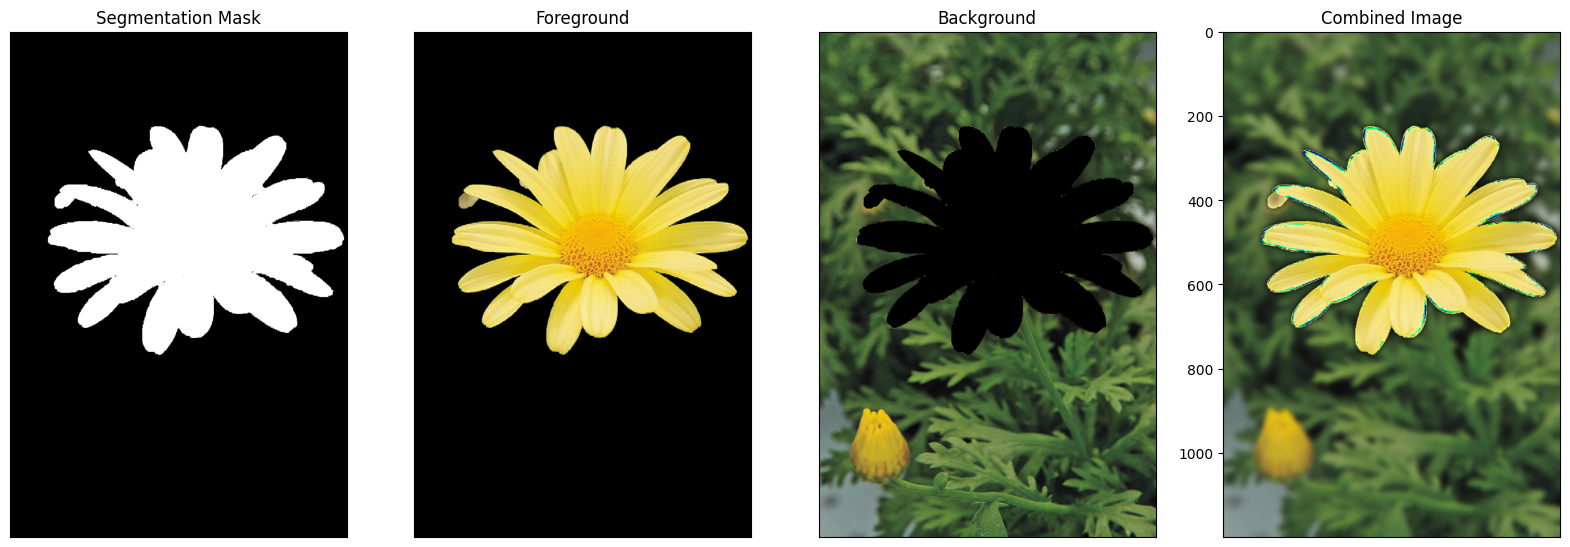

In [35]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('9.jpeg')

# Create a mask and initialize with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangular area around the foreground (adjust these coordinates)
start_x, start_y, end_x, end_y = 90, 100, 800, 800
rect = (start_x, start_y, end_x, end_y)

# Initialize the foreground and background models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary segmentation result
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create the foreground and background images
foreground = image * mask2[:, :, np.newaxis]
background = image - foreground






# Apply Gaussian blur to the background
blurred_background = cv2.GaussianBlur(background, (0, 0), 6)

# Show the original and enhanced images side by side
#combined_image = np.hstack((foreground, enhanced_image))

combined_image = np.add(foreground, blurred_background)
#combined_image = np.add(foreground, background)

# Show the results
f, ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(cv2.cvtColor(mask2 * 255,cv2.COLOR_BGR2RGB))# show the foreground mask
ax[0].set_title('Segmentation Mask')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB))# Show the hue plane
ax[1].set_title('Foreground')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv2.cvtColor(background,cv2.COLOR_BGR2RGB))# show the background mask
ax[2].set_title('Background')
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[3].imshow(cv2.cvtColor(combined_image,cv2.COLOR_BGR2RGB))# show the background mask
ax[3].set_title('Combined Image')
ax[3].set_xticks([]), ax[2].set_yticks([])
plt.show()
